In [172]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis')

from src.models.constants import STATIC_FEATURES, TIME_SERIES_FEATURES
from src.data.live_season_data import GetFPLData
from src.features.custom_transformers import TimeSeriesFeatures

pd.set_option('display.max_columns', None)

DATA_PATH = 'data/processed/'

### Historical data

In [116]:
fpl_data_all_seasons = pd.read_parquet(DATA_PATH + 'fpl_data_2016_to_2019.parquet')
print(fpl_data_all_seasons.shape)
fpl_data_all_seasons.head()

(67986, 73)


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,errors_leading_to_goal,errors_leading_to_goal_attempt,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,gw,season,team_name,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Apr,kickoff_month_Aug,kickoff_month_Dec,kickoff_month_Feb,kickoff_month_Jan,kickoff_month_Mar,kickoff_month_May,kickoff_month_Nov,kickoff_month_Oct,kickoff_month_Sep,late_kickoff,early_kickoff,ID
0,aaron_cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,14023,0,0,0,1,2,0.0,0,0,0,0,5.5,False,0,0,1,2016-17,West Ham United,0,0,1,0,0,0,Chelsea,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,aaron_cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,11531,0,0,0,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,2,2016-17,West Ham United,0,0,1,0,0,0,Bournemouth,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,aaron_cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,9587,0,0,0,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,3,2016-17,West Ham United,0,0,1,0,0,0,Manchester City,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,aaron_cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,8427,0,0,0,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,4,2016-17,West Ham United,0,0,1,0,0,0,Watford,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,aaron_cresswell,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7933,0,0,0,2,4,0.0,0,-520,29,549,5.4,False,0,0,5,2016-17,West Ham United,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [117]:
# Columns used to train GW2 model
AVAILABLE_COLUMNS = [
    'name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
    'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'gw', 'season', 'team_name',
    'promoted_side', 'top_6_last_season', 'position_DEF', 'position_FWD', 'position_GK', 'position_MID', 'team_name_opponent', 'promoted_side_opponent', 'top_6_last_season_opponent', 'kickoff_month_Aug',
    'late_kickoff', 'early_kickoff', 'ID', 'kickoff_month_Apr', 'kickoff_month_Dec', 'kickoff_month_Feb', 'kickoff_month_Jan', 'kickoff_month_Mar', 'kickoff_month_May', 'kickoff_month_Nov', 'kickoff_month_Oct',
    'kickoff_month_Sep'
]

In [118]:
fpl_data_all_seasons = fpl_data_all_seasons[AVAILABLE_COLUMNS]
fpl_data_all_seasons.shape

(67986, 52)

### Current season previous GW data

In [119]:
current_gw_data = pd.read_parquet('data/processed/latest_gw_data.parquet')
print(current_gw_data.shape)
current_gw_data.head()

(1055, 43)


,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,gw,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,name,team_name,promoted_side,top_6_last_season,season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,ID
0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,33117,1,0,0.0,0,0,0,0,5.5,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,474
1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,36709,1,2,0.0,0,-5280,2868,8148,5.5,True,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,474
2,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,7979,1,0,0.0,0,0,0,0,5.5,False,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,203
3,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,8154,1,2,0.0,0,-1652,336,1988,5.5,True,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,203
4,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,93903,1,0,0.0,0,0,0,0,5.5,False,0,sead_kolasinac,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,465


In [120]:
set(AVAILABLE_COLUMNS) - set(current_gw_data.columns)

{'kickoff_month_Apr',
 'kickoff_month_Dec',
 'kickoff_month_Feb',
 'kickoff_month_Jan',
 'kickoff_month_Mar',
 'kickoff_month_May',
 'kickoff_month_Nov',
 'kickoff_month_Oct',
 'kickoff_month_Sep'}

In [121]:
for col in list(set(AVAILABLE_COLUMNS) - set(current_gw_data.columns)):
    current_gw_data[col] = 0

In [122]:
set(AVAILABLE_COLUMNS) - set(current_gw_data.columns)

set()

In [123]:
current_gw_data.shape

(1055, 52)

### Future fixture data

In [3]:
get_fpl_data = GetFPLData('2019-20')

In [4]:
upcoming_fixtures = get_fpl_data.get_all_fixture_data_from_api()

2019-08-22 22:25:09,726 - Completed 10/529
2019-08-22 22:25:12,263 - Completed 20/529
2019-08-22 22:25:14,872 - Completed 30/529
2019-08-22 22:25:17,350 - Completed 40/529
2019-08-22 22:25:19,790 - Completed 50/529
2019-08-22 22:25:22,210 - Completed 60/529
2019-08-22 22:25:24,869 - Completed 70/529
2019-08-22 22:25:27,456 - Completed 80/529
2019-08-22 22:25:30,006 - Completed 90/529
2019-08-22 22:25:32,554 - Completed 100/529
2019-08-22 22:25:35,075 - Completed 110/529
2019-08-22 22:25:37,749 - Completed 120/529
2019-08-22 22:25:40,477 - Completed 130/529
2019-08-22 22:25:43,229 - Completed 140/529
2019-08-22 22:25:45,514 - Completed 150/529
2019-08-22 22:25:47,712 - Completed 160/529
2019-08-22 22:25:50,067 - Completed 170/529
2019-08-22 22:25:52,408 - Completed 180/529
2019-08-22 22:25:55,144 - Completed 190/529
2019-08-22 22:25:57,933 - Completed 200/529
2019-08-22 22:26:00,479 - Completed 210/529
2019-08-22 22:26:03,258 - Completed 220/529
2019-08-22 22:26:05,887 - Completed 230/5

In [124]:
print(upcoming_fixtures.shape)
upcoming_fixtures.head()

(19044, 41)


,code,difficulty,gw,event_name,finished,was_home,kickoff_time,minutes,provisional_start_time,team_a,team_a_score,team_h,team_h_score,name,id,team_name,promoted_side,top_6_last_season,season,value,opponent_team,team_name_opponent,team,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Apr,kickoff_month_Aug,kickoff_month_Dec,kickoff_month_Feb,kickoff_month_Jan,kickoff_month_Mar,kickoff_month_May,kickoff_month_Nov,kickoff_month_Oct,kickoff_month_Sep,late_kickoff,early_kickoff,position_DEF,position_FWD,position_GK,position_MID
0,1059725,5,3,Gameweek 3,False,False,2019-08-24 17:30:00+01:00,0,False,1,None,10,None,shkodran_mustafi,1,Arsenal,0,1,2019-20,5.4,10.0,Liverpool,10,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1059732,4,4,Gameweek 4,False,True,2019-09-01 16:30:00+01:00,0,False,17,None,1,None,shkodran_mustafi,1,Arsenal,0,1,2019-20,5.4,17.0,Tottenham Hotspur,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1059750,3,5,Gameweek 5,False,False,2019-09-15 16:30:00+01:00,0,False,1,None,18,None,shkodran_mustafi,1,Arsenal,0,1,2019-20,5.4,18.0,Watford,18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1059752,2,6,Gameweek 6,False,True,2019-09-22 16:30:00+01:00,0,False,2,None,1,None,shkodran_mustafi,1,Arsenal,0,1,2019-20,5.4,2.0,Aston Villa,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1059768,4,7,Gameweek 7,False,False,2019-09-30 20:00:00+01:00,0,False,1,None,12,None,shkodran_mustafi,1,Arsenal,0,1,2019-20,5.4,12.0,Manchester United,12,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0


In [125]:
upcoming_gw_3_features = upcoming_fixtures.copy()
upcoming_gw_3_features = upcoming_gw_3_features[upcoming_gw_3_features['gw'] == 3]

In [126]:
static_columns = list(set(fpl_data_all_seasons_with_current.columns).intersection(set(upcoming_gw_3_features.columns)))

In [127]:
upcoming_gw_3_features = upcoming_gw_3_features[static_columns]
upcoming_gw_3_features.shape

(529, 30)

In [128]:
upcoming_gw_3_features.head()

,kickoff_month_May,value,top_6_last_season_opponent,promoted_side,season,promoted_side_opponent,name,late_kickoff,was_home,position_MID,position_FWD,team_name_opponent,kickoff_month_Feb,position_DEF,team_name,top_6_last_season,kickoff_month_Dec,kickoff_month_Aug,minutes,kickoff_month_Oct,team_h_score,kickoff_month_Apr,kickoff_month_Mar,kickoff_month_Nov,gw,kickoff_month_Jan,team_a_score,kickoff_month_Sep,position_GK,early_kickoff
0,0,5.4,1,0,2019-20,0,shkodran_mustafi,1,False,0,0,Liverpool,0,1,Arsenal,1,0,1,0,0,None,0,0,0,3,0,None,0,0,0
36,0,5.5,1,0,2019-20,0,héctor_bellerín,1,False,0,0,Liverpool,0,1,Arsenal,1,0,1,0,0,None,0,0,0,3,0,None,0,0,0
72,0,5.5,1,0,2019-20,0,sead_kolasinac,1,False,0,0,Liverpool,0,1,Arsenal,1,0,1,0,0,None,0,0,0,3,0,None,0,0,0
108,0,5.0,1,0,2019-20,0,ainsley_maitland-niles,1,False,0,0,Liverpool,0,1,Arsenal,1,0,1,0,0,None,0,0,0,3,0,None,0,0,0
144,0,5.0,1,0,2019-20,0,sokratis_papastathopoulos,1,False,0,0,Liverpool,0,1,Arsenal,1,0,1,0,0,None,0,0,0,3,0,None,0,0,0


### Combine historical, current known season data and future fixture data

In [129]:
set(fpl_data_all_seasons.columns) - set(current_gw_data.columns)

set()

In [130]:
fpl_data_all_seasons_with_current = fpl_data_all_seasons.append(current_gw_data, sort=False)
fpl_data_all_seasons_with_current.shape

(69041, 52)

In [131]:
fpl_data_all_seasons_with_current_and_future = fpl_data_all_seasons_with_current.append(upcoming_gw_3_features, sort=False)
fpl_data_all_seasons_with_current_and_future.shape

(69570, 52)

In [132]:
fpl_data_all_seasons_with_current_and_future['season_order'] = fpl_data_all_seasons_with_current_and_future['season'].map({
    '2016-17': 1,
    '2017-18': 2,
    '2018-19': 3,
    '2019-20': 4
})

In [133]:
fpl_data_all_seasons_with_current_and_future.sort_values(['name', 'season_order', 'gw'], inplace=True)
fpl_data_all_seasons_with_current_and_future.reset_index(drop=True, inplace=True)

__Shift forward static features e.g. next opponent etc.__

In [134]:
for feature in ['value', 'was_home', 'promoted_side_opponent', 'top_6_last_season_opponent', 'kickoff_month_Apr', 'kickoff_month_Aug', 'kickoff_month_Dec',
                'kickoff_month_Feb', 'kickoff_month_Jan', 'kickoff_month_Mar', 'kickoff_month_May', 'kickoff_month_Nov', 'kickoff_month_Oct', 
                'kickoff_month_Sep', 'late_kickoff', 'early_kickoff']:
    fpl_data_all_seasons_with_current_and_future[f'next_match_{feature}'] = fpl_data_all_seasons_with_current_and_future.groupby('name')[f'{feature}'].shift(-1)

### Create time series features

Create new ID

In [135]:
fpl_data_all_seasons_with_current_and_future.drop('ID', axis=1, inplace=True)

In [136]:
id_df = fpl_data_all_seasons_with_current_and_future.groupby(['name']).count().reset_index()[['name']]
id_df['ID'] = id_df.index + 1
print(id_df.shape)
id_df.head()

(1199, 2)


,name,ID
0,aaron_cresswell,1
1,aaron_lennon,2
2,aaron_mooy,3
3,aaron_ramsdale,4
4,aaron_ramsey,5


In [137]:
fpl_data_all_seasons_with_current_and_future = fpl_data_all_seasons_with_current_and_future.merge(id_df, how='left', on=['name'])

In [138]:
TIME_SERIES_FEATURES_LITE = list(set(AVAILABLE_COLUMNS).intersection(TIME_SERIES_FEATURES))

In [139]:
ts_features = TimeSeriesFeatures(halflife=4, max_lag=4, max_diff=4, columns=TIME_SERIES_FEATURES_LITE)

In [140]:
fpl_data_all_seasons_with_current_and_future[TIME_SERIES_FEATURES_LITE].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69570 entries, 0 to 69569
Data columns (total 25 columns):
bonus                69041 non-null float64
value                69570 non-null float64
creativity           69041 non-null object
total_points         69041 non-null float64
ict_index            69041 non-null object
red_cards            69041 non-null float64
transfers_in         69041 non-null float64
transfers_out        69041 non-null float64
own_goals            69041 non-null float64
clean_sheets         69041 non-null float64
penalties_saved      69041 non-null float64
saves                69041 non-null float64
threat               69041 non-null object
bps                  69041 non-null float64
selected             69041 non-null float64
goals_scored         69041 non-null float64
assists              69041 non-null float64
minutes              69570 non-null int64
team_h_score         69041 non-null object
yellow_cards         69041 non-null float64
transfers_balance

In [141]:
for col in TIME_SERIES_FEATURES_LITE:
    fpl_data_all_seasons_with_current_and_future[col] = pd.to_numeric(fpl_data_all_seasons_with_current_and_future[col])

In [142]:
%%time
fpl_data_all_seasons_with_ts = ts_features.fit_transform(fpl_data_all_seasons_with_current_and_future)
print(fpl_data_all_seasons_with_ts.shape)

(69570, 294)
CPU times: user 1min 52s, sys: 43.3 s, total: 2min 36s
Wall time: 1min 52s


In [143]:
fpl_data_all_seasons_with_ts.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,season,team_name,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,kickoff_month_Apr,kickoff_month_Dec,kickoff_month_Feb,kickoff_month_Jan,kickoff_month_Mar,kickoff_month_May,kickoff_month_Nov,kickoff_month_Oct,kickoff_month_Sep,season_order,next_match_value,next_match_was_home,next_match_promoted_side_opponent,next_match_top_6_last_season_opponent,next_match_kickoff_month_Apr,next_match_kickoff_month_Aug,next_match_kickoff_month_Dec,next_match_kickoff_month_Feb,next_match_kickoff_month_Jan,next_match_kickoff_month_Mar,next_match_kickoff_month_May,next_match_kickoff_month_Nov,next_match_kickoff_month_Oct,next_match_kickoff_month_Sep,next_match_late_kickoff,next_match_early_kickoff,ID,bonus_EMA,bonus_L1,bonus_L2,bonus_L3,bonus_L4,bonus_D1,bonus_D2,bonus_D3,bonus_D4,value_EMA,value_L1,value_L2,value_L3,value_L4,value_D1,value_D2,value_D3,value_D4,creativity_EMA,creativity_L1,creativity_L2,creativity_L3,creativity_L4,creativity_D1,creativity_D2,creativity_D3,creativity_D4,total_points_EMA,total_points_L1,total_points_L2,total_points_L3,total_points_L4,total_points_D1,total_points_D2,total_points_D3,total_points_D4,ict_index_EMA,ict_index_L1,ict_index_L2,ict_index_L3,ict_index_L4,ict_index_D1,ict_index_D2,ict_index_D3,ict_index_D4,red_cards_EMA,red_cards_L1,red_cards_L2,red_cards_L3,red_cards_L4,red_cards_D1,red_cards_D2,red_cards_D3,red_cards_D4,transfers_in_EMA,transfers_in_L1,transfers_in_L2,transfers_in_L3,transfers_in_L4,transfers_in_D1,transfers_in_D2,transfers_in_D3,transfers_in_D4,transfers_out_EMA,transfers_out_L1,transfers_out_L2,transfers_out_L3,transfers_out_L4,transfers_out_D1,transfers_out_D2,transfers_out_D3,transfers_out_D4,own_goals_EMA,own_goals_L1,own_goals_L2,own_goals_L3,own_goals_L4,own_goals_D1,own_goals_D2,own_goals_D3,own_goals_D4,clean_sheets_EMA,clean_sheets_L1,clean_sheets_L2,clean_sheets_L3,clean_sheets_L4,clean_sheets_D1,clean_sheets_D2,clean_sheets_D3,clean_sheets_D4,penalties_saved_EMA,penalties_saved_L1,penalties_saved_L2,penalties_saved_L3,penalties_saved_L4,penalties_saved_D1,penalties_saved_D2,penalties_saved_D3,penalties_saved_D4,saves_EMA,saves_L1,saves_L2,saves_L3,saves_L4,saves_D1,saves_D2,saves_D3,saves_D4,threat_EMA,threat_L1,threat_L2,threat_L3,threat_L4,threat_D1,threat_D2,threat_D3,threat_D4,bps_EMA,bps_L1,bps_L2,bps_L3,bps_L4,bps_D1,bps_D2,bps_D3,bps_D4,selected_EMA,selected_L1,selected_L2,selected_L3,selected_L4,selected_D1,selected_D2,selected_D3,selected_D4,goals_scored_EMA,goals_scored_L1,goals_scored_L2,goals_scored_L3,goals_scored_L4,goals_scored_D1,goals_scored_D2,goals_scored_D3,goals_scored_D4,assists_EMA,assists_L1,assists_L2,assists_L3,assists_L4,assists_D1,assists_D2,assists_D3,assists_D4,minutes_EMA,minutes_L1,minutes_L2,minutes_L3,minutes_L4,minutes_D1,minutes_D2,minutes_D3,minutes_D4,team_h_score_EMA,team_h_score_L1,team_h_score_L2,team_h_score_L3,team_h_score_L4,team_h_score_D1,team_h_score_D2,team_h_score_D3,team_h_score_D4,yellow_cards_EMA,yellow_cards_L1,yellow_cards_L2,yellow_cards_L3,yellow_cards_L4,yellow_cards_D1,yellow_cards_D2,yellow_cards_D3,yellow_cards_D4,transfers_balance_EMA,transfers_balance_L1,transfers_balance_L2,transfers_balance_L3,transfers_balance_L4,transfers_balance_D1,transfers_balance_D2,transfers_balance_D3,transfers_balance_D4,penalties_missed_EMA,penalties_missed_L1,penalties_missed_L2,penalties_missed_L3,penalties_missed_L4,penalties_missed_D1,penalties_missed_D2,penalties_missed_D3,penalties_missed_D4,influence_EMA,influence_L1,influence_L2,influence_L3,influence_L4,influence_D1,influence_D2,influence_D3,inf

### Make predictions

In [145]:
mean_total_points = 1.3767687465066336  # Previous imputed value

In [146]:
# Target cannot contain any nulls
fpl_data_all_seasons_with_ts['total_points_plus_1_gw'] = fpl_data_all_seasons_with_ts.groupby(['name'])['total_points'].shift(-1).fillna(mean_total_points)

In [147]:
fpl_data_all_seasons_with_ts.drop(
    ['total_points', 'name', 'season', 'team_name', 'team_name_opponent'],
    axis=1,
    inplace=True
)

In [152]:
test = fpl_data_all_seasons_with_ts[
    (fpl_data_all_seasons_with_ts['season_order'] == 4) & (fpl_data_all_seasons_with_ts['gw'] == 2)
]

In [153]:
test.head()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,kickoff_month_Apr,kickoff_month_Dec,kickoff_month_Feb,kickoff_month_Jan,kickoff_month_Mar,kickoff_month_May,kickoff_month_Nov,kickoff_month_Oct,kickoff_month_Sep,season_order,next_match_value,next_match_was_home,next_match_promoted_side_opponent,next_match_top_6_last_season_opponent,next_match_kickoff_month_Apr,next_match_kickoff_month_Aug,next_match_kickoff_month_Dec,next_match_kickoff_month_Feb,next_match_kickoff_month_Jan,next_match_kickoff_month_Mar,next_match_kickoff_month_May,next_match_kickoff_month_Nov,next_match_kickoff_month_Oct,next_match_kickoff_month_Sep,next_match_late_kickoff,next_match_early_kickoff,ID,bonus_EMA,bonus_L1,bonus_L2,bonus_L3,bonus_L4,bonus_D1,bonus_D2,bonus_D3,bonus_D4,value_EMA,value_L1,value_L2,value_L3,value_L4,value_D1,value_D2,value_D3,value_D4,creativity_EMA,creativity_L1,creativity_L2,creativity_L3,creativity_L4,creativity_D1,creativity_D2,creativity_D3,creativity_D4,total_points_EMA,total_points_L1,total_points_L2,total_points_L3,total_points_L4,total_points_D1,total_points_D2,total_points_D3,total_points_D4,ict_index_EMA,ict_index_L1,ict_index_L2,ict_index_L3,ict_index_L4,ict_index_D1,ict_index_D2,ict_index_D3,ict_index_D4,red_cards_EMA,red_cards_L1,red_cards_L2,red_cards_L3,red_cards_L4,red_cards_D1,red_cards_D2,red_cards_D3,red_cards_D4,transfers_in_EMA,transfers_in_L1,transfers_in_L2,transfers_in_L3,transfers_in_L4,transfers_in_D1,transfers_in_D2,transfers_in_D3,transfers_in_D4,transfers_out_EMA,transfers_out_L1,transfers_out_L2,transfers_out_L3,transfers_out_L4,transfers_out_D1,transfers_out_D2,transfers_out_D3,transfers_out_D4,own_goals_EMA,own_goals_L1,own_goals_L2,own_goals_L3,own_goals_L4,own_goals_D1,own_goals_D2,own_goals_D3,own_goals_D4,clean_sheets_EMA,clean_sheets_L1,clean_sheets_L2,clean_sheets_L3,clean_sheets_L4,clean_sheets_D1,clean_sheets_D2,clean_sheets_D3,clean_sheets_D4,penalties_saved_EMA,penalties_saved_L1,penalties_saved_L2,penalties_saved_L3,penalties_saved_L4,penalties_saved_D1,penalties_saved_D2,penalties_saved_D3,penalties_saved_D4,saves_EMA,saves_L1,saves_L2,saves_L3,saves_L4,saves_D1,saves_D2,saves_D3,saves_D4,threat_EMA,threat_L1,threat_L2,threat_L3,threat_L4,threat_D1,threat_D2,threat_D3,threat_D4,bps_EMA,bps_L1,bps_L2,bps_L3,bps_L4,bps_D1,bps_D2,bps_D3,bps_D4,selected_EMA,selected_L1,selected_L2,selected_L3,selected_L4,selected_D1,selected_D2,selected_D3,selected_D4,goals_scored_EMA,goals_scored_L1,goals_scored_L2,goals_scored_L3,goals_scored_L4,goals_scored_D1,goals_scored_D2,goals_scored_D3,goals_scored_D4,assists_EMA,assists_L1,assists_L2,assists_L3,assists_L4,assists_D1,assists_D2,assists_D3,assists_D4,minutes_EMA,minutes_L1,minutes_L2,minutes_L3,minutes_L4,minutes_D1,minutes_D2,minutes_D3,minutes_D4,team_h_score_EMA,team_h_score_L1,team_h_score_L2,team_h_score_L3,team_h_score_L4,team_h_score_D1,team_h_score_D2,team_h_score_D3,team_h_score_D4,yellow_cards_EMA,yellow_cards_L1,yellow_cards_L2,yellow_cards_L3,yellow_cards_L4,yellow_cards_D1,yellow_cards_D2,yellow_cards_D3,yellow_cards_D4,transfers_balance_EMA,transfers_balance_L1,transfers_balance_L2,transfers_balance_L3,transfers_balance_L4,transfers_balance_D1,transfers_balance_D2,transfers_balance_D3,transfers_balance_D4,penalties_missed_EMA,penalties_missed_L1,penalties_missed_L2,penalties_missed_L3,penalties_missed_L4,penalties_missed_D1,penalties_missed_D2,penalties_missed_D3,penalties_missed_D4,influence_EMA,influence_L1,influence_L2,influence_L3,influence_L4,influence_D1,influence_D2,influence_D3,influence_D4,team_a_score_EMA,team_a_score_L1,team_a_scor

In [154]:
test_copy = test.copy()

In [155]:
print(test_copy.shape)
test_copy = test_copy[~test_copy['next_match_was_home'].isnull()]
test_copy['next_match_was_home'] = test_copy['next_match_was_home'].astype(bool)
test_copy.shape

(529, 290)


(529, 290)

In [156]:
import pickle
lgbm_model = pickle.load(open('src/models/pickles/v1_1_lgbm_model.pickle', 'rb'))

In [157]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=50, objective=None,
              random_state=None, reg_alpha=0.03, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [158]:
predictions_gw3_201920 = lgbm_model.predict(test_copy.drop(['total_points_plus_1_gw', 'ID'], axis=1))

In [159]:
test_copy['predictions'] = predictions_gw3_201920

In [160]:
# Get player names
test_copy = test_copy.merge(id_df, on='ID')

In [161]:
test_copy.sort_values('predictions', inplace=True, ascending=False)

In [165]:
test_copy.head(20)

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,kickoff_month_Apr,kickoff_month_Dec,kickoff_month_Feb,kickoff_month_Jan,kickoff_month_Mar,kickoff_month_May,kickoff_month_Nov,kickoff_month_Oct,kickoff_month_Sep,season_order,next_match_value,next_match_was_home,next_match_promoted_side_opponent,next_match_top_6_last_season_opponent,next_match_kickoff_month_Apr,next_match_kickoff_month_Aug,next_match_kickoff_month_Dec,next_match_kickoff_month_Feb,next_match_kickoff_month_Jan,next_match_kickoff_month_Mar,next_match_kickoff_month_May,next_match_kickoff_month_Nov,next_match_kickoff_month_Oct,next_match_kickoff_month_Sep,next_match_late_kickoff,next_match_early_kickoff,ID,bonus_EMA,bonus_L1,bonus_L2,bonus_L3,bonus_L4,bonus_D1,bonus_D2,bonus_D3,bonus_D4,value_EMA,value_L1,value_L2,value_L3,value_L4,value_D1,value_D2,value_D3,value_D4,creativity_EMA,creativity_L1,creativity_L2,creativity_L3,creativity_L4,creativity_D1,creativity_D2,creativity_D3,creativity_D4,total_points_EMA,total_points_L1,total_points_L2,total_points_L3,total_points_L4,total_points_D1,total_points_D2,total_points_D3,total_points_D4,ict_index_EMA,ict_index_L1,ict_index_L2,ict_index_L3,ict_index_L4,ict_index_D1,ict_index_D2,ict_index_D3,ict_index_D4,red_cards_EMA,red_cards_L1,red_cards_L2,red_cards_L3,red_cards_L4,red_cards_D1,red_cards_D2,red_cards_D3,red_cards_D4,transfers_in_EMA,transfers_in_L1,transfers_in_L2,transfers_in_L3,transfers_in_L4,transfers_in_D1,transfers_in_D2,transfers_in_D3,transfers_in_D4,transfers_out_EMA,transfers_out_L1,transfers_out_L2,transfers_out_L3,transfers_out_L4,transfers_out_D1,transfers_out_D2,transfers_out_D3,transfers_out_D4,own_goals_EMA,own_goals_L1,own_goals_L2,own_goals_L3,own_goals_L4,own_goals_D1,own_goals_D2,own_goals_D3,own_goals_D4,clean_sheets_EMA,clean_sheets_L1,clean_sheets_L2,clean_sheets_L3,clean_sheets_L4,clean_sheets_D1,clean_sheets_D2,clean_sheets_D3,clean_sheets_D4,penalties_saved_EMA,penalties_saved_L1,penalties_saved_L2,penalties_saved_L3,penalties_saved_L4,penalties_saved_D1,penalties_saved_D2,penalties_saved_D3,penalties_saved_D4,saves_EMA,saves_L1,saves_L2,saves_L3,saves_L4,saves_D1,saves_D2,saves_D3,saves_D4,threat_EMA,threat_L1,threat_L2,threat_L3,threat_L4,threat_D1,threat_D2,threat_D3,threat_D4,bps_EMA,bps_L1,bps_L2,bps_L3,bps_L4,bps_D1,bps_D2,bps_D3,bps_D4,selected_EMA,selected_L1,selected_L2,selected_L3,selected_L4,selected_D1,selected_D2,selected_D3,selected_D4,goals_scored_EMA,goals_scored_L1,goals_scored_L2,goals_scored_L3,goals_scored_L4,goals_scored_D1,goals_scored_D2,goals_scored_D3,goals_scored_D4,assists_EMA,assists_L1,assists_L2,assists_L3,assists_L4,assists_D1,assists_D2,assists_D3,assists_D4,minutes_EMA,minutes_L1,minutes_L2,minutes_L3,minutes_L4,minutes_D1,minutes_D2,minutes_D3,minutes_D4,team_h_score_EMA,team_h_score_L1,team_h_score_L2,team_h_score_L3,team_h_score_L4,team_h_score_D1,team_h_score_D2,team_h_score_D3,team_h_score_D4,yellow_cards_EMA,yellow_cards_L1,yellow_cards_L2,yellow_cards_L3,yellow_cards_L4,yellow_cards_D1,yellow_cards_D2,yellow_cards_D3,yellow_cards_D4,transfers_balance_EMA,transfers_balance_L1,transfers_balance_L2,transfers_balance_L3,transfers_balance_L4,transfers_balance_D1,transfers_balance_D2,transfers_balance_D3,transfers_balance_D4,penalties_missed_EMA,penalties_missed_L1,penalties_missed_L2,penalties_missed_L3,penalties_missed_L4,penalties_missed_D1,penalties_missed_D2,penalties_missed_D3,penalties_missed_D4,influence_EMA,influence_L1,influence_L2,influence_L3,influence_L4,influence_D1,influence_D2,influence_D3,influence_D4,team_a_score_EMA,team_a_score_L1,team_a_scor

In [166]:
# Get team names
player_team = fpl_data_all_seasons_with_current_and_future[
    (fpl_data_all_seasons_with_current_and_future['season_order'] == 4)].groupby(['name', 'team_name']).count().reset_index()[['name', 'team_name']]

In [167]:
test_copy = test_copy.merge(player_team, on='name', how='left')

In [168]:
test_copy = test_copy[['name', 'position_DEF', 'position_FWD', 'position_GK', 'position_MID', 'predictions', 'team_name', 'next_match_value']]
test_copy.head()

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value
0,troy_deeney,0,1,0,0,4.427512,Watford,6.4
1,joel_matip,1,0,0,0,4.327432,Liverpool,5.4
2,rui pedro_dos santos patrício,0,0,1,0,4.288376,Wolverhampton Wanderers,5.0
3,roberto_firmino,0,1,0,0,4.202051,Liverpool,9.5
4,tim_krul,0,0,1,0,4.170576,Norwich,4.5


In [169]:
print(test_copy.shape)
test_copy.dropna(axis=0, inplace=True)
print(test_copy.shape)

(529, 8)
(529, 8)


In [170]:
test_copy.tail()

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value
524,yves_bissouma,0,0,0,1,0.270008,Brighton & Hove Albion,5.0
525,caoimhin_kelleher,0,0,1,0,0.260772,Liverpool,4.5
526,andy_lonergan,0,0,1,0,0.227835,Liverpool,4.5
527,fikayo_tomori,1,0,0,0,0.120311,Chelsea,4.5
528,kevin_danso,1,0,0,0,0.117501,Southampton,4.5


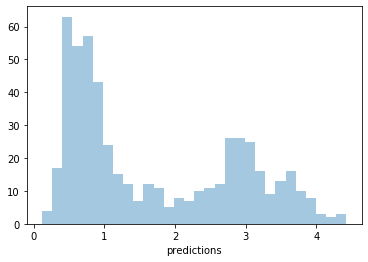

In [173]:
sns.distplot(test_copy['predictions'], kde=False, bins=30)

In [174]:
test_copy.to_parquet('data/gw_predictions/gw3_v1.1_player_predictions.parquet', index=False)

In [175]:
test_copy.head(20)

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,team_name,next_match_value
0,troy_deeney,0,1,0,0,4.427512,Watford,6.4
1,joel_matip,1,0,0,0,4.327432,Liverpool,5.4
2,rui pedro_dos santos patrício,0,0,1,0,4.288376,Wolverhampton Wanderers,5.0
3,roberto_firmino,0,1,0,0,4.202051,Liverpool,9.5
4,tim_krul,0,0,1,0,4.170576,Norwich,4.5
5,aaron_ramsdale,0,0,1,0,4.119653,Bournemouth,4.5
6,declan_rice,0,0,0,1,4.076981,West Ham United,5.0
7,ainsley_maitland-niles,1,0,0,0,4.011265,Arsenal,5.0
8,jonjo_shelvey,0,0,0,1,3.975872,Newcastle United,5.0
9,grant_hanley,1,0,0,0,3.968428,Norwich,4.0
